In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import model_selection
import sklearn.feature_selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('einkommen.train')
colums_names = ['Age', 'Emp_Type', 'W_Factor', 'Education', 'Training_Period', 'Marital_Status', 'Emp_Area',
                'Partnership', 'Ethnicity', 'Gender', 'Gains', 'Losses', 'WW_Time', 'Country', 'Income']
df.columns = colums_names

In [3]:
df[:4999]

,Age,Emp_Type,W_Factor,Education,Training_Period,Marital_Status,Emp_Area,Partnership,Ethnicity,Gender,Gains,Losses,WW_Time,Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,43,Private,222971,5th-6th,3,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Mexico,<=50K
4995,31,Private,259425,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4996,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,26,Private,245880,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              29999 non-null  int64 
 1   Emp_Type         29999 non-null  object
 2   W_Factor         29999 non-null  int64 
 3   Education        29999 non-null  object
 4   Training_Period  29999 non-null  int64 
 5   Marital_Status   29999 non-null  object
 6   Emp_Area         29999 non-null  object
 7   Partnership      29999 non-null  object
 8   Ethnicity        29999 non-null  object
 9   Gender           29999 non-null  object
 10  Gains            29999 non-null  int64 
 11  Losses           29999 non-null  int64 
 12  WW_Time          29999 non-null  int64 
 13  Country          29999 non-null  object
 14  Income           29999 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'W_Factor'}>],
       [<AxesSubplot:title={'center':'Training_Period'}>,
        <AxesSubplot:title={'center':'Gains'}>],
       [<AxesSubplot:title={'center':'Losses'}>,
        <AxesSubplot:title={'center':'WW_Time'}>]], dtype=object)

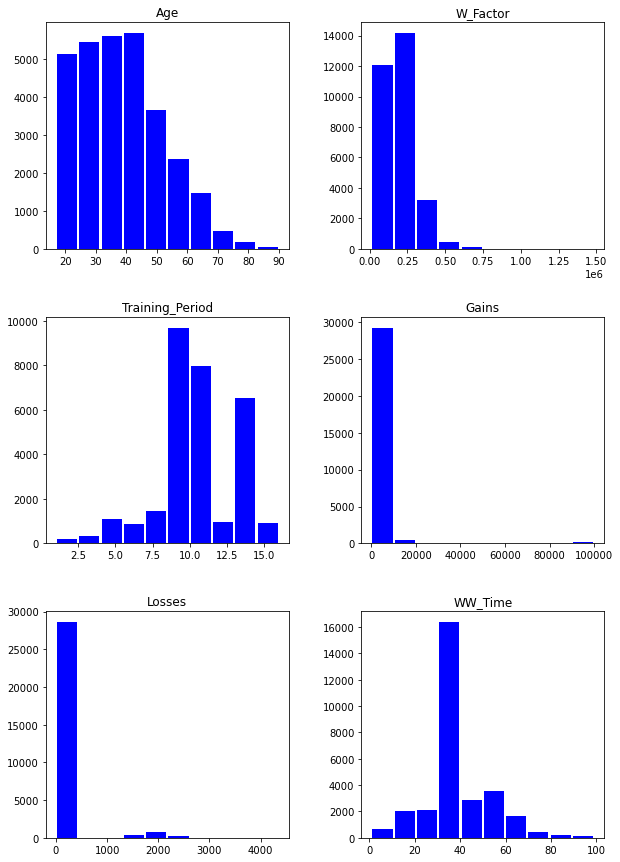

In [5]:
df.hist(figsize=(10,15),color="b",rwidth=0.9,grid=False)

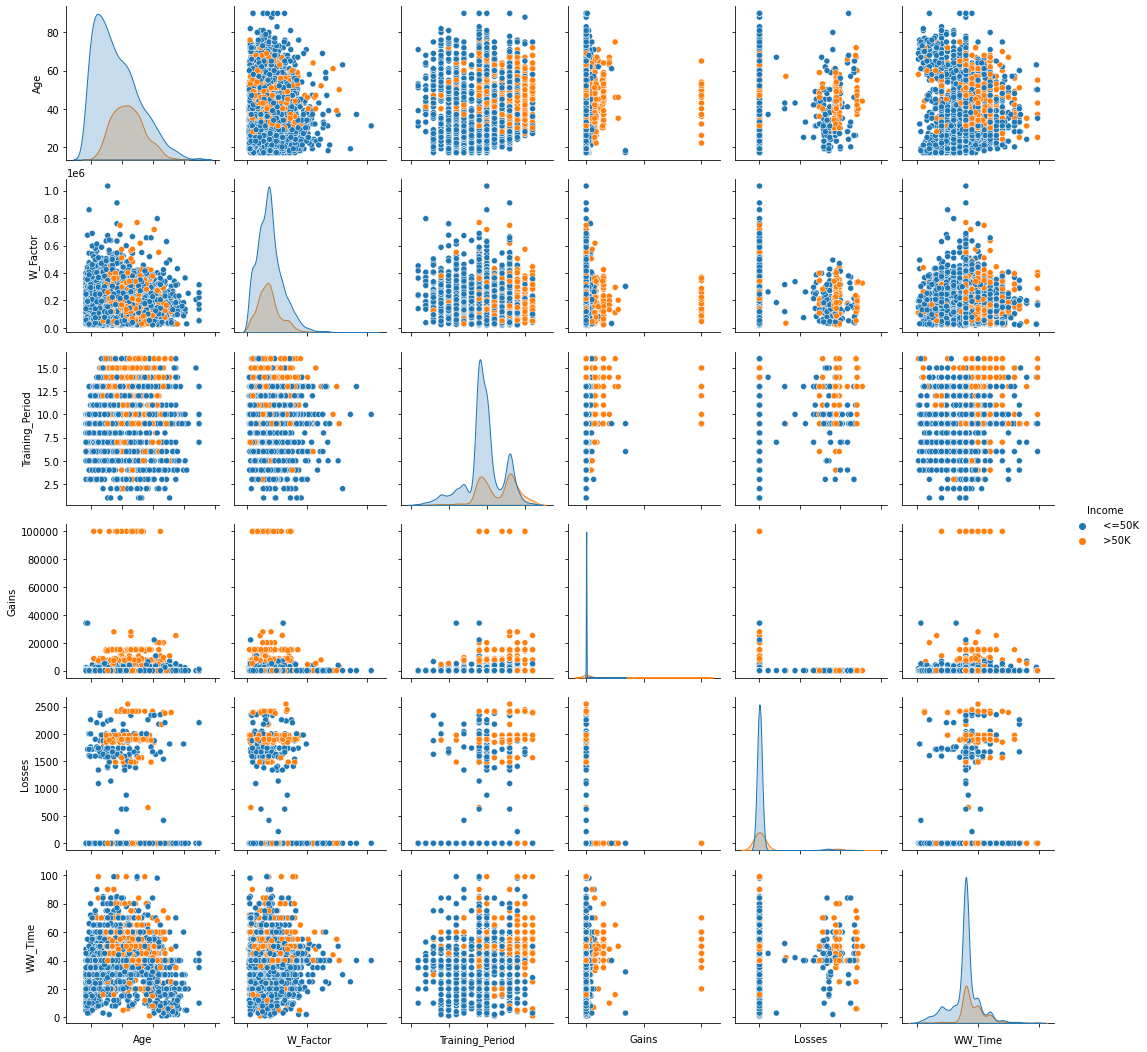

In [6]:
#Displaying Data in the form of a pairplot
pairplot=sns.pairplot(df.iloc[:4999], hue="Income") #since income is target variable
pairplot.set(xticklabels=[])

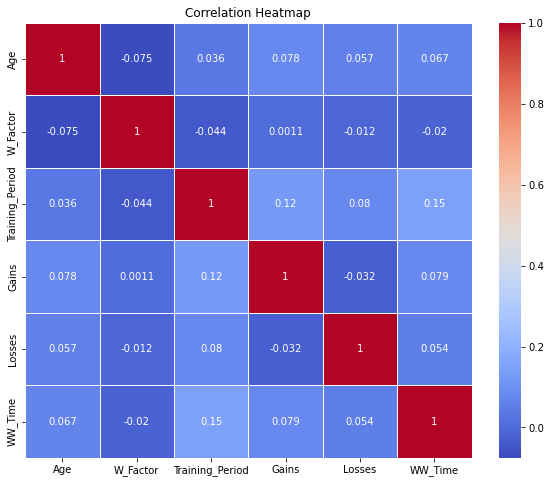

In [7]:
#Co-relation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
print(df['Income'].value_counts())

 ?        25000
 <=50K     3778
 >50K      1221
Name: Income, dtype: int64


In [9]:
# Replacing <=50K by 0 and >50K by 1 to make our task easier
df['Income']=df['Income'].str.strip()  # Removes leading/trailing whitespace
df['Income']=df['Income'].replace('<=50K', 0)
df['Income']=df['Income'].replace('>50K', 1)

print(df['Income'].value_counts())

?    25000
0     3778
1     1221
Name: Income, dtype: int64


In [10]:
# Count unique values per column
unique_value_counts=df.nunique()
print(unique_value_counts)

# We do this to determine if can classify some of them iin order to save computational time

Age                   72
Emp_Type               9
W_Factor           20432
Education             16
Training_Period       16
Marital_Status         7
Emp_Area              15
Partnership            6
Ethnicity              5
Gender                 2
Gains                118
Losses                91
WW_Time               94
Country               42
Income                 3
dtype: int64


In [11]:
df['Country'].value_counts()

 United-States                 26870
 Mexico                          602
 ?                               539
 Philippines                     177
 Germany                         122
 Canada                          115
 Puerto-Rico                     112
 El-Salvador                      96
 India                            94
 England                          87
 Cuba                             87
 South                            76
 Jamaica                          73
 China                            68
 Vietnam                          62
 Italy                            62
 Dominican-Republic               62
 Guatemala                        60
 Japan                            56
 Poland                           56
 Columbia                         55
 Taiwan                           48
 Haiti                            40
 Iran                             40
 Portugal                         33
 Nicaragua                        32
 Peru                             28
 

In [12]:
# Since it has 42 values and apart from USA, other countries don't have that much value, we will split it into 2 sets. One for USA and one for Others
df['Country']=['United-States' if x == ' United-States' else 'Other' for x in df['Country']]

In [13]:
df['Marital_Status'].value_counts()

# Here, we can't seperate in only 2 ctaegories like that for country

 Married-civ-spouse       13768
 Never-married             9849
 Divorced                  4102
 Separated                  953
 Widowed                    919
 Married-spouse-absent      385
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64

In [14]:
df.head()

,Age,Emp_Type,W_Factor,Education,Training_Period,Marital_Status,Emp_Area,Partnership,Ethnicity,Gender,Gains,Losses,WW_Time,Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [15]:
d_list = ['Emp_Type','Education','Marital_Status','Emp_Area','Partnership','Ethnicity','Gender','Country']
# Since they are not numerical data, so performing one-hot encoding
def dummy_df(df, d_list):
    for x in d_list:
        dummies =pd.get_dummies(df[x], prefix=x, dummy_na = False)
        df = df.drop(x,1)
        df = pd.concat([df,dummies], axis = 1)
    return df

In [16]:
X = df.drop('Income',axis=1)  
y = df.Income # Since we have to predict income

In [17]:
X = dummy_df(X, d_list)

/var/folders/vz/m1374jz14h97zfkfkyxsr6840000gp/T/ipykernel_14808/1892929095.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(x,1)
/var/folders/vz/m1374jz14h97zfkfkyxsr6840000gp/T/ipykernel_14808/1892929095.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(x,1)
/var/folders/vz/m1374jz14h97zfkfkyxsr6840000gp/T/ipykernel_14808/1892929095.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(x,1)
/var/folders/vz/m1374jz14h97zfkfkyxsr6840000gp/T/ipykernel_14808/1892929095.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(x,1)
/var/folders/vz/m1374jz14h97zfkfkyxsr6840000gp/T/ipykernel_14808

In [18]:
X

,Age,W_Factor,Training_Period,Gains,Losses,WW_Time,Emp_Type_ ?,Emp_Type_ Federal-gov,Emp_Type_ Local-gov,Emp_Type_ Never-worked,...,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male,Country_Other,Country_United-States
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,28,338409,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,37,284582,14,0,0,40,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,30,55481,14,0,0,45,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
29995,48,119471,11,0,0,56,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
29996,61,167347,10,0,0,35,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
29997,41,184378,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [19]:
X.shape

(29999, 68)

In [20]:
missing_values = X.isna().sum()

# Print the result
print(missing_values)

Age                      0
W_Factor                 0
Training_Period          0
Gains                    0
Losses                   0
                        ..
Ethnicity_ White         0
Gender_ Female           0
Gender_ Male             0
Country_Other            0
Country_United-States    0
Length: 68, dtype: int64


In [21]:
#Now, replacing ? with NaN values

y = y.replace('?',np.NaN)

#Now, we split the data into known and unknown elements based on the information we've got
X_k = X.iloc[:4999]
y_k = y.iloc[:4999].astype(int)


y_uk = y.iloc[5000:]
X_uk = X.iloc[5000:]


In [22]:
X_k.shape


(4999, 68)

In [23]:
X_uk.shape

(24999, 68)

In [24]:
#Training, Validation and Testing 

#Initiate the training and Validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_k,y_k,test_size=0.25,random_state=30)

#Making Training and testing Datasets
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.25,random_state=40)


In [25]:
X_train

,Age,W_Factor,Training_Period,Gains,Losses,WW_Time,Emp_Type_ ?,Emp_Type_ Federal-gov,Emp_Type_ Local-gov,Emp_Type_ Never-worked,...,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male,Country_Other,Country_United-States
3779,51,237729,10,0,0,40,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3923,50,116287,12,0,0,60,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
225,60,24215,6,0,0,10,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1925,30,204374,13,0,1741,48,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1516,59,284834,13,2885,0,30,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,31,80145,10,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
85,49,268234,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3018,49,36032,10,0,0,40,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1844,45,273194,9,3325,0,40,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [26]:
# To improve model perfoormance, we are doing Feature Selection.

# Initialize RFE with an estimator 
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=15)

# Fit the selector on the training data
selector.fit(X_train, y_train)

# Get the selected feature indices
indices_selected = selector.support_

col_names = [X_train.columns[i] for i, selected in enumerate(indices_selected) if selected]

selected_features = [i for i, selected in enumerate(indices_selected) if selected]
print("Selected Features:", selected_features)


/Users/tauqeerrumaney/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tauqeerrumaney/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/tauqeerrumaney/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tauqeerrumaney/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Selected Features: [7, 11, 17, 18, 21, 29, 33, 42, 43, 44, 45, 46, 48, 56, 62]


In [27]:
select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train,y_train)
indices_selected = selected_features.get_support(indices = True)
col_names = [X_train.columns[i] for i in indices_selected]

X_train_select = X_train[col_names]
X_valid_select = X_val[col_names]
X_test_select = X_test[col_names]
X_train_select.shape

/Users/tauqeerrumaney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/tauqeerrumaney/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(2811, 20)

In [28]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200,300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [3, 5, 10, 15, 20]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_valid_select, y_val)

print("Best Hyperparameters:")
print(grid_search.best_params_)

print("Best Model:")
print(grid_search.best_estimator_)

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 200}
Best Model:
RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=15,
                       n_estimators=200)


In [29]:
# Evaluate the final model on the test set
test_accuracy = grid_search.score(X_test_select, y_test)
print(test_accuracy)

0.849680170575693


In [30]:
svm = SVC()
svm.fit(X_train_select, y_train)
svm_prediction = svm.predict(X_test_select)

In [31]:
accuracy = accuracy_score(y_test, svm_prediction)
print(accuracy)

0.8070362473347548


In [32]:
from sklearn.naive_bayes import GaussianNB
# Hyperparameter search 
priors = [[0.1, 0.9], [0.3, 0.7], [0.5, 0.5],[0.2,0.8]]

best_accuracy = 0
best_priors = None

for prior in priors:
    clf = GaussianNB()
    clf.class_prior_ = prior

    clf.fit(X_train_select, y_train)
    y_preds = clf.predict(X_valid_select)

    accuracy = accuracy_score(y_val, y_preds)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_priors = prior

# Use the best priors for your final model
clf = GaussianNB()
clf.class_prior_ = best_priors
clf.fit(X_train_select, y_train)

# Evaluate the final model on a test set
y_test_pred = clf.predict(X_test_select)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [33]:
test_accuracy

0.8230277185501066

In [34]:
# Predict the target values 
y_pred = grid_search.predict(X_test_select)

# If you need probability scores for binary classification 
y_pred_prob = grid_search.predict_proba(X_test_select)[:, 1]

In [35]:
print('ConfusionMatrix for RFC: ')
print(confusion_matrix(y_test,y_pred))

ConfusionMatrix for RFC: 
[[678  42]
 [ 99 119]]


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       720
           1       0.74      0.55      0.63       218

    accuracy                           0.85       938
   macro avg       0.81      0.74      0.77       938
weighted avg       0.84      0.85      0.84       938



In [37]:
print('ConfusionMatrix for SVM: ')
print(confusion_matrix(y_test,svm_prediction))

ConfusionMatrix for SVM: 
[[697  23]
 [158  60]]


In [38]:
print(classification_report(y_test,svm_prediction))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       720
           1       0.72      0.28      0.40       218

    accuracy                           0.81       938
   macro avg       0.77      0.62      0.64       938
weighted avg       0.79      0.81      0.77       938



In [39]:
print('ConfusionMatrix for Gaussian: ')
print(confusion_matrix(y_test,y_test_pred))

ConfusionMatrix for Gaussian: 
[[640  80]
 [ 86 132]]


In [40]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       720
           1       0.62      0.61      0.61       218

    accuracy                           0.82       938
   macro avg       0.75      0.75      0.75       938
weighted avg       0.82      0.82      0.82       938



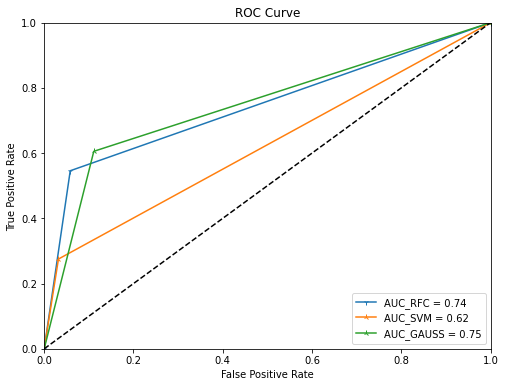

In [41]:
#ROC Curve
auc_rfc = roc_auc_score(y_test, y_pred)
auc_svm = roc_auc_score(y_test, svm_prediction)
auc_gauss = roc_auc_score(y_test, y_test_pred)
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, y_pred)
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, svm_prediction)
fpr_gauss, tpr_gauss, threshold_gauss = roc_curve(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rfc, tpr_rfc, marker='1', label=f'AUC_RFC = {auc_rfc:.2f}')
plt.plot(fpr_svm, tpr_svm, marker='2', label=f'AUC_SVM = {auc_svm:.2f}')
plt.plot(fpr_gauss, tpr_gauss, marker='2', label=f'AUC_GAUSS = {auc_gauss:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

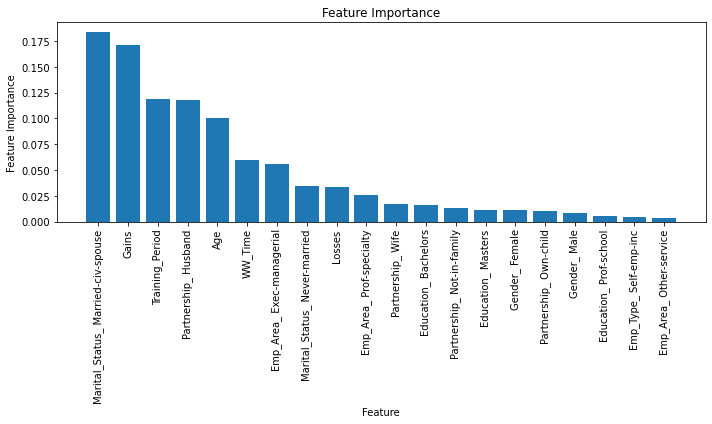

In [42]:
# Get feature importances from the model
best_estimator = grid_search.best_estimator_
feature_importances = best_estimator.feature_importances_
feature_names = X_train_select.columns

# Sort the features by importance 
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar chart for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_names)), sorted_importances, align="center")
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()